# BUI analyse d'un centre commercial
## Julien(Billeter, Muhlemann)

In [9]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt

path = "data/"
filename = "marketing_campaign.csv"
def load_df(path=path, filename=filename):
    file_path = os.path.join(path, filename)
    data_df = pd.read_csv(file_path, sep='\t')
    return data_df

In [10]:

def clean_df(data_df):
    num_df = data_df.select_dtypes(include='number')
    imputer = KNNImputer(missing_values=np.nan, n_neighbors=3)  # SimpleImputer(strategy='mean')
    imputed_num_df = pd.DataFrame(imputer.fit_transform(num_df), columns=num_df.columns)

    # Remove columns with std = 0
    imputed_num_df = imputed_num_df.loc[:, imputed_num_df.std() != 0]

    scaler = RobustScaler()
    non_num_df = data_df.select_dtypes(exclude='number')
    data_scaled = scaler.fit_transform(imputed_num_df)

    data_scaled_df = pd.DataFrame(data_scaled, columns=imputed_num_df.columns, index=imputed_num_df.index)
    final_df = pd.concat([data_scaled_df, non_num_df], axis=1)
    
    return final_df, data_scaled_df

data_df = load_df()
final_df, X_scaled = clean_df(data_df)

data_numerical = final_df.select_dtypes(include='number').copy()
data_non_numerical = final_df.select_dtypes(exclude='number').copy()

https://cedric.cnam.fr/vertigo/Cours/ml/tpDonneesManquantes.html

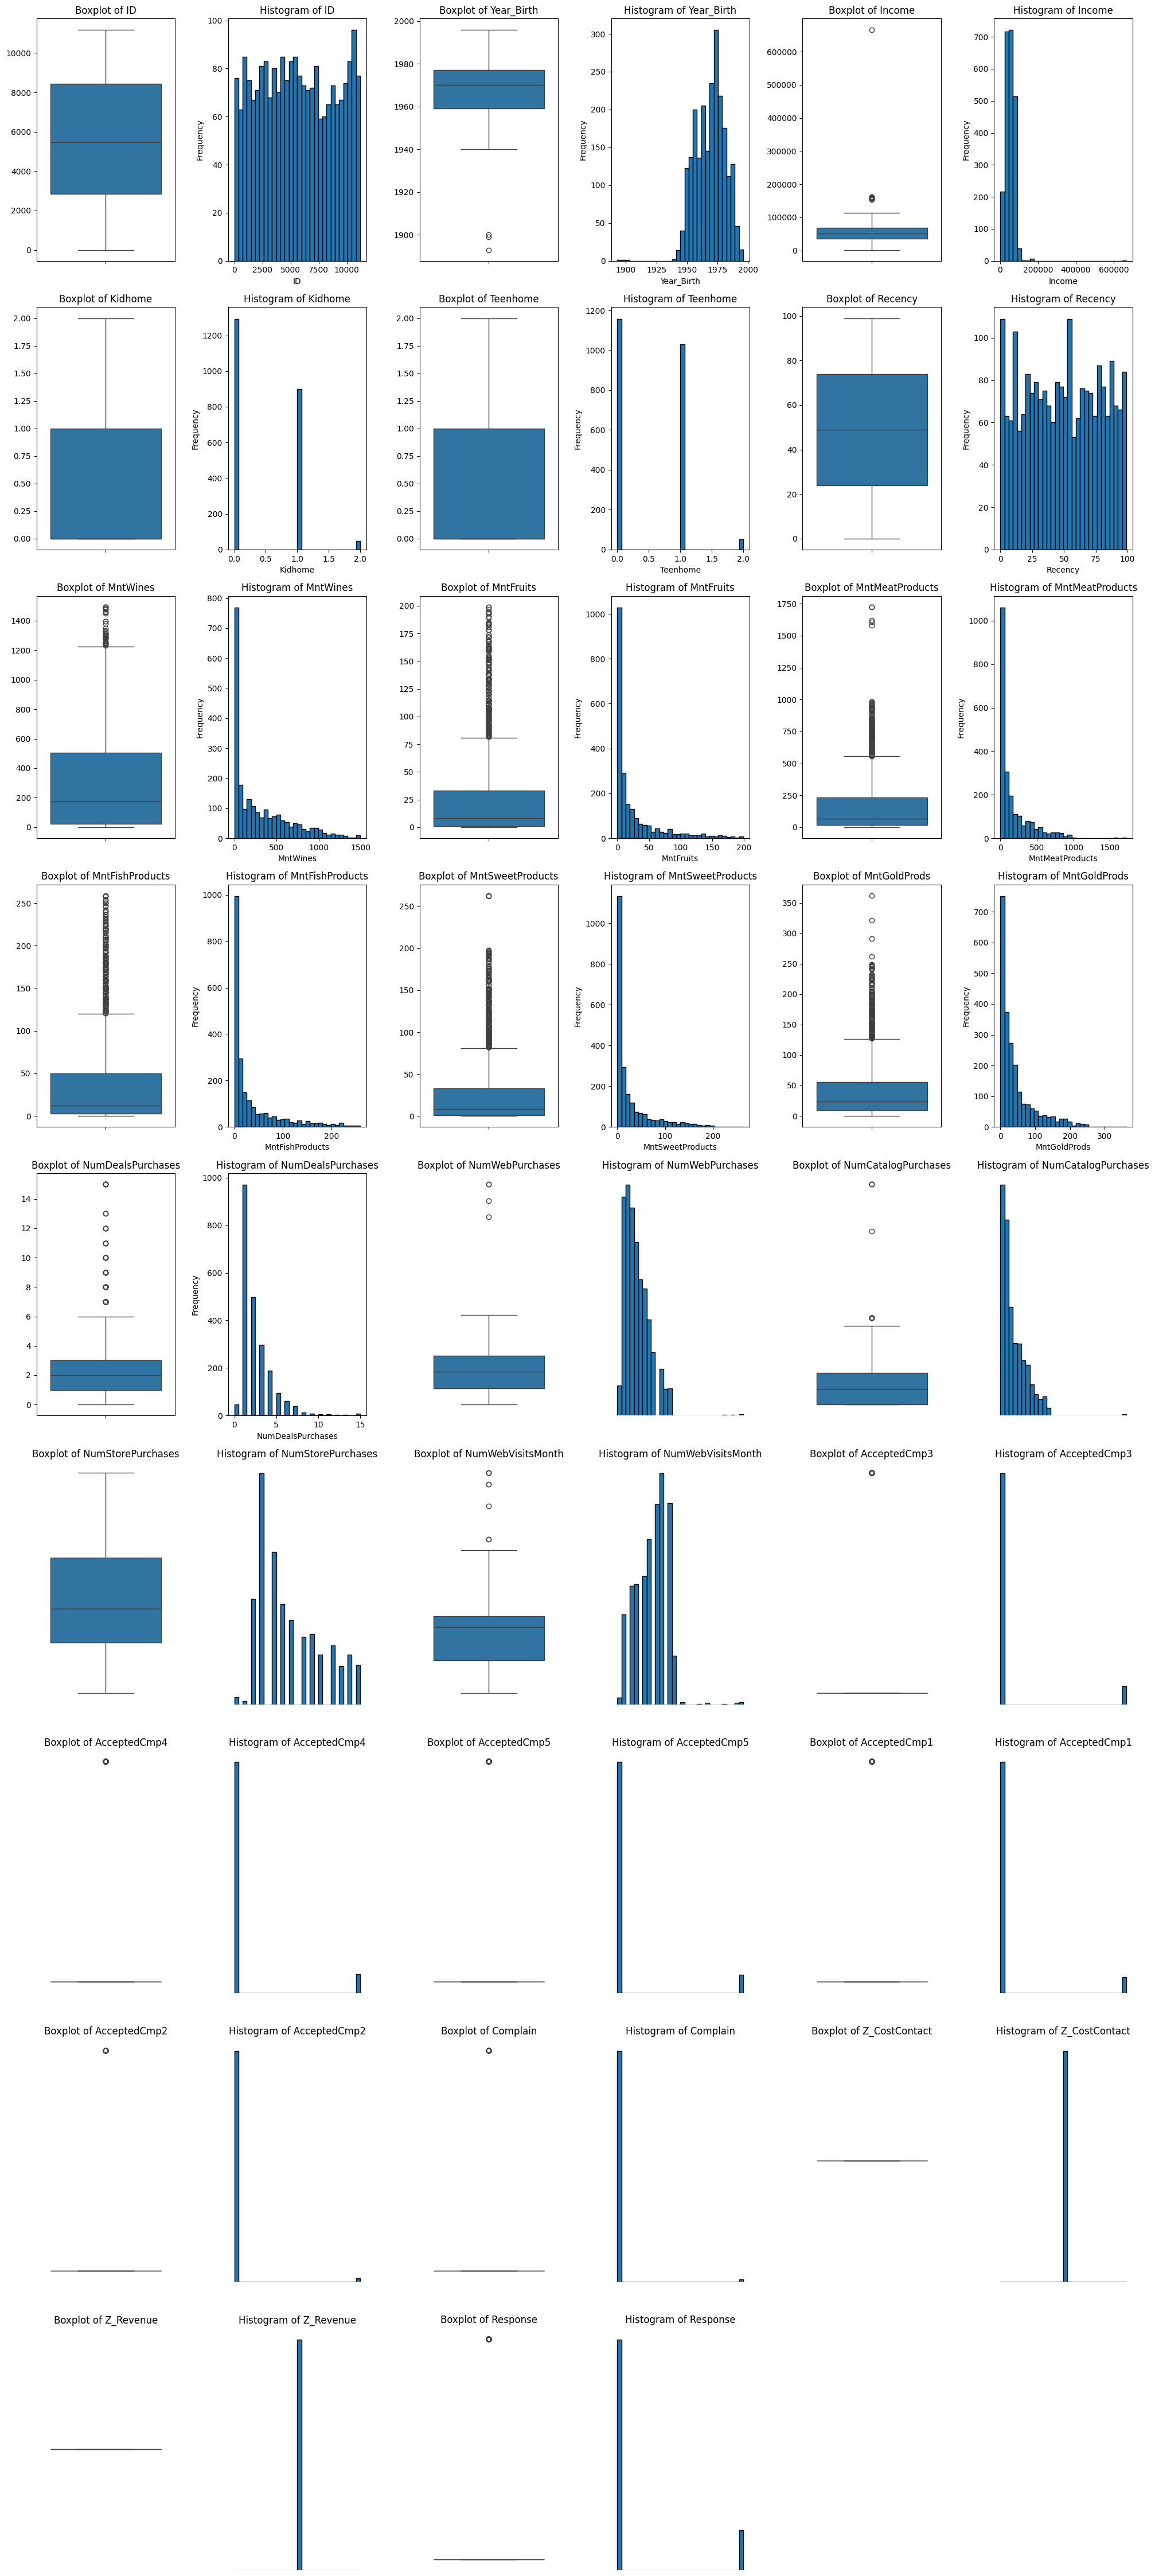

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = 3  # Adjust the number of columns as needed
n_rows = (len(data_df.select_dtypes(include='number').columns) // n_cols) + (len(data_df.select_dtypes(include='number').columns) % n_cols > 0)  # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(20, 5 * n_rows))  # Double the number of columns to accommodate both boxplot and histogram

# Flatten axes array for easy iteration if there are multiple rows
axes = axes.flatten()

# Loop through each column and create a boxplot and histogram
for i, col in enumerate(data_df.select_dtypes(include='number').columns):
    # Boxplot on the left
    sns.boxplot(ax=axes[2 * i], data=data_df[col])
    axes[2 * i].set_title(f'Boxplot of {col}')
    axes[2 * i].set_xlabel('')  # Optional: hide xlabel for clarity
    axes[2 * i].set_ylabel('')  # Optional: hide ylabel for clarity
    
    # Histogram on the right
    axes[2 * i + 1].hist(data_df[col], bins=30, edgecolor='black')
    axes[2 * i + 1].set_title(f'Histogram of {col}')
    axes[2 * i + 1].set_xlabel(col)
    axes[2 * i + 1].set_ylabel('Frequency')

# Hide any unused subplots (if the number of columns is not a perfect multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## 1 K-means ++ PCA 2D

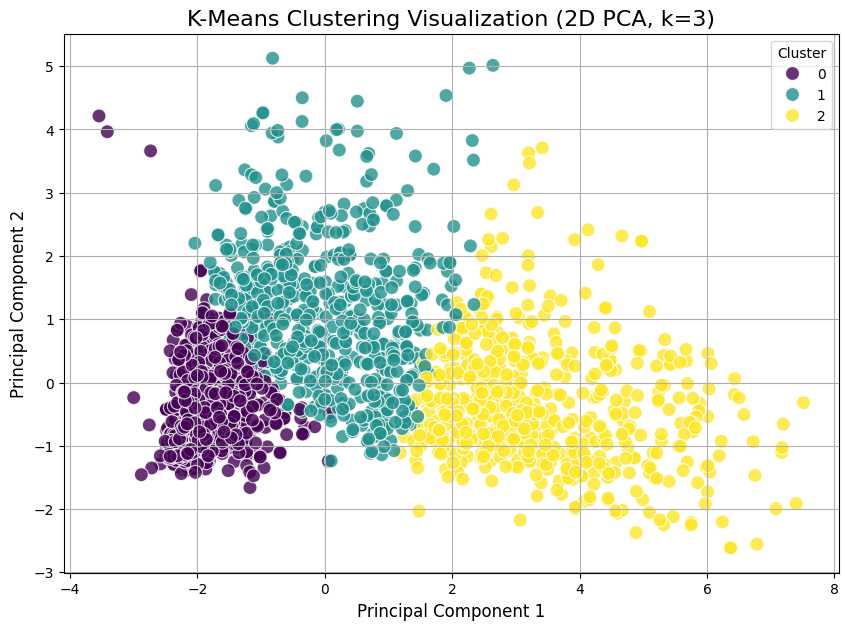

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Copy of the scaled data
data_scaled_df_pca = data_numerical.copy()

# Step 1: Apply K-Means with an initial number of clusters
optimal_k = 3  # Number of clusters chosen based on your analysis (e.g., from the elbow method)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
final_df['Cluster'] = kmeans.fit_predict(data_scaled_df_pca)  # Apply K-Means on scaled data

# Step 2: PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
data_pca = pca.fit_transform(data_scaled_df_pca)  # Apply PCA on the original data

# Convert to DataFrame for easier handling
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Add cluster labels to PCA DataFrame
pca_df['Cluster'] = final_df['Cluster']

# Step 3: Visualization of the Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title(f'K-Means Clustering Visualization (2D PCA, k={optimal_k})', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## 2 Pipeline MLP prédiction des comportements d'achat

c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3171
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8780
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8225
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8666
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7777
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7913
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7638
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8442
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7772
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7116
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7338
Epoch 12/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7304
Epoch 13/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7359
Epoch 14/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7629
Epoch 15/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6759
Epoc

c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


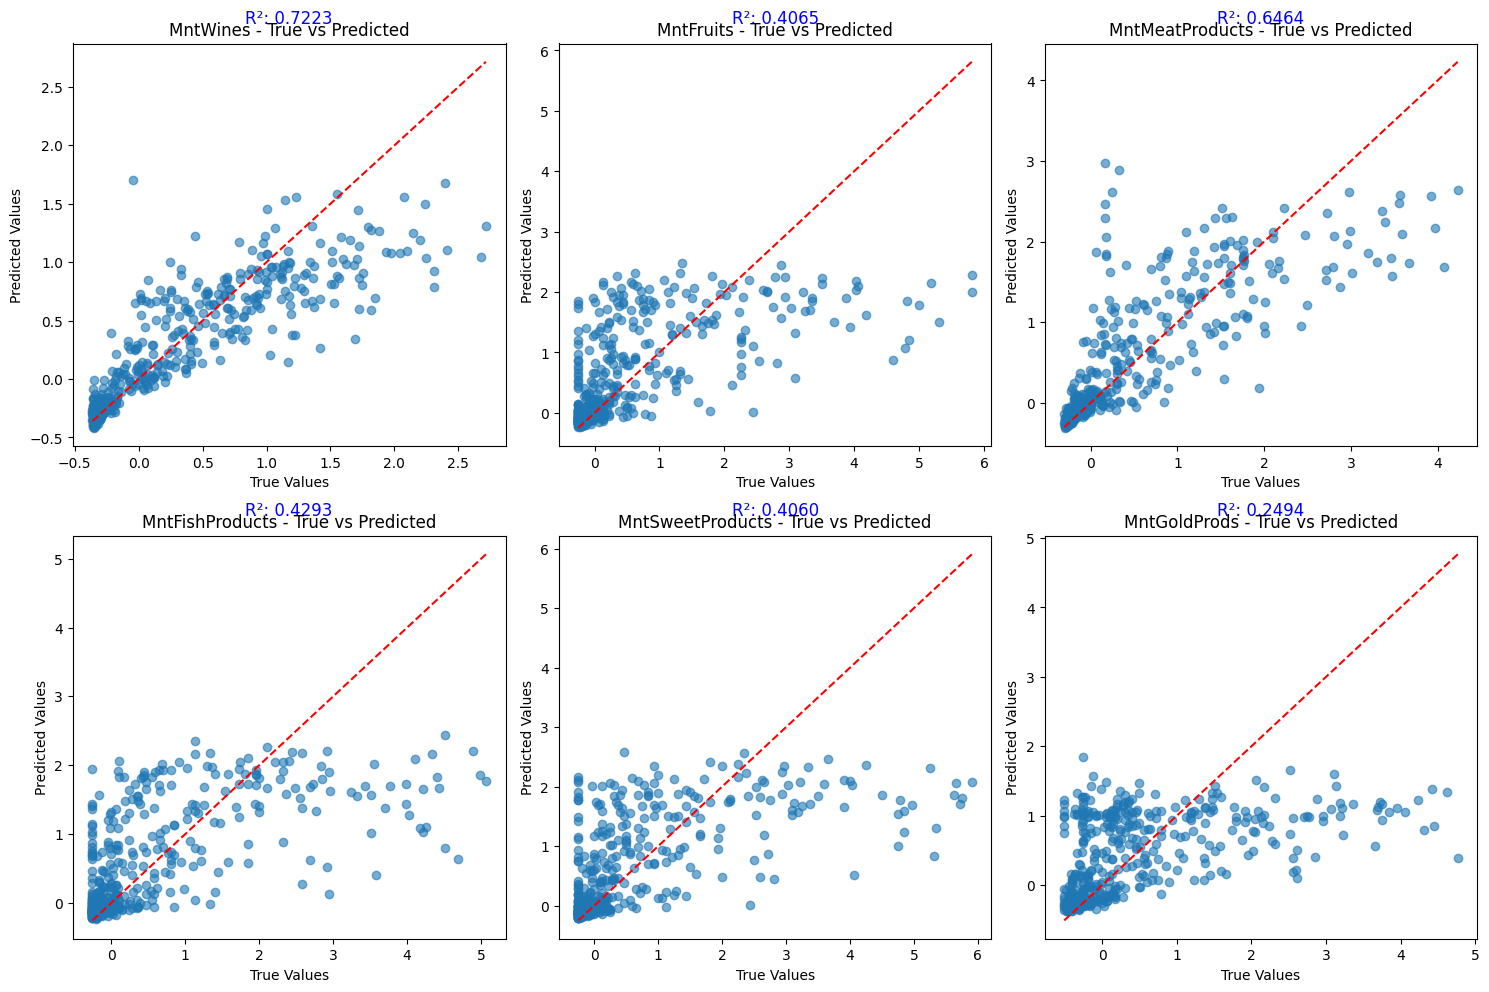

In [13]:
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define a custom Keras regressor class
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, epochs=100, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def create_model(self, input_dim):
        model = Sequential([
            Dense(64, activation='relu', input_dim=input_dim),  # Input layer
            Dropout(0.3),  # Dropout to prevent overfitting
            Dense(32, activation='relu'),  # Hidden layer
            Dropout(0.3),  # Dropout layer
            Dense(len(target_features), activation='linear')  # Output layer
        ])
        model.compile(optimizer='adam', loss='mse')
        return model

    def fit(self, X, y):
        input_dim = X.shape[1]
        self.model = self.create_model(input_dim)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Assuming data is preloaded, and we are focusing on the main parts
target_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Preprocessing pipeline
categorical_cols = data_numerical.select_dtypes(exclude='number').columns.tolist()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_cols)],
    remainder='passthrough'  # Leave numeric columns as they are
)

# Prepare the data
X = data_numerical.drop(columns=target_features)  # Features
y = data_numerical[target_features]  # Target variables

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the full pipeline (Preprocessing + Model)
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', CustomKerasRegressor(epochs=100, batch_size=32))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = mlp_pipeline.predict(X_test)

# Step 9: Evaluate the model's performance
mse_overall = mean_squared_error(y_test, y_pred)
r2_overall = r2_score(y_test, y_pred)

print(f'Overall Mean Squared Error (MSE): {mse_overall:.4f}')
print(f'Overall R² Score: {r2_overall:.4f}')

# Individual target metrics
for i, feature in enumerate(target_features):
    mse_feature = mean_squared_error(y_test[feature], y_pred[:, i])
    r2_feature = r2_score(y_test[feature], y_pred[:, i])
    print(f'{feature} - Mean Squared Error (MSE): {mse_feature:.4f}')
    print(f'{feature} - R² Score: {r2_feature:.4f}')

# Step 10: Visualize predictions vs true values for each target feature with R² above each plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(target_features):
    ax = axes[i // 3, i % 3]
    ax.scatter(y_test[feature], y_pred[:, i], alpha=0.6)
    ax.set_title(f'{feature} - True vs Predicted')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.plot([y_test[feature].min(), y_test[feature].max()],
            [y_test[feature].min(), y_test[feature].max()], color='red', linestyle='--')
    
    r2_feature = r2_score(y_test[feature], y_pred[:, i])
    ax.annotate(f'R²: {r2_feature:.4f}', xy=(0.5, 1.05), xycoords='axes fraction', ha='center', fontsize=12, color='blue')

plt.tight_layout()
plt.show()


## 

## 3 Prédiction du revenu client avec random forest

MSE: 0.0648, R²: 0.8390


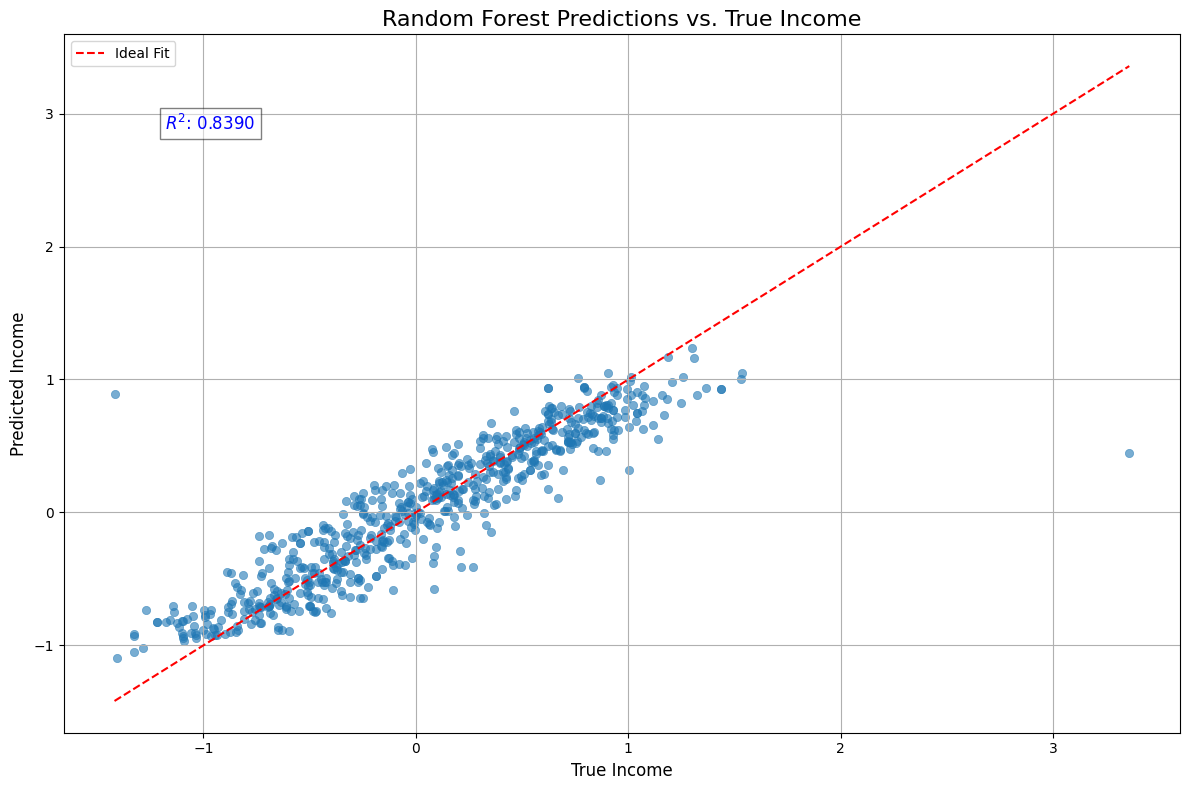

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define target (CLV proxy) and features
y = final_df['Income']  # Proxy for lifetime value
X = final_df.drop(columns=['Income', 'ID', 'Cluster'], errors='ignore')

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}, R²: {r2:.4f}')

# Visualize true vs. predicted values
plt.figure(figsize=(12, 8))  # Increase the figure size for more space
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Random Forest Predictions vs. True Income', fontsize=16)
plt.xlabel('True Income', fontsize=12)
plt.ylabel('Predicted Income', fontsize=12)
plt.legend()

# Add R² text to the plot
plt.text(
    x=y_test.min() + (y_test.max() - y_test.min()) * 0.05,  # Position x
    y=y_test.max() - (y_test.max() - y_test.min()) * 0.1,  # Position y
    s=f'$R^2$: {r2:.4f}', fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.5)
)

plt.grid(True)
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


## 4 Prédiction efficacité des campagnes marketing GradientBoosting

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       577
         1.0       0.58      0.27      0.37        95

    accuracy                           0.87       672
   macro avg       0.73      0.62      0.65       672
weighted avg       0.85      0.87      0.85       672



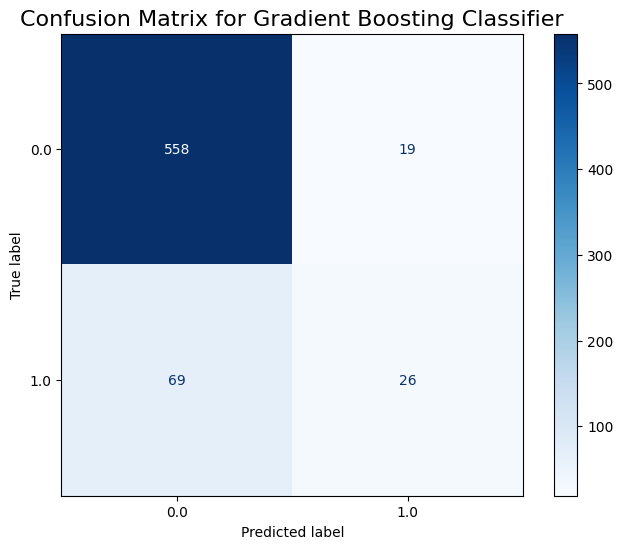

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Define target and features
y = final_df['Response']  # Response to campaigns
X = final_df.drop(columns=['Response', 'ID'], errors='ignore')
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)

# Evaluate model
y_pred = gbc_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gbc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc_model.classes_)

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=16)
plt.show()


## 5 analyse des préférences selon catégories de produit

In [16]:
# Feature engineering for CLV
#CLV = (TotalSpending)
final_df['TotalSpending'] = (
    final_df['MntWines'] +
    final_df.get('MntFruits', 0) +
    final_df.get('MntMeatProducts', 0) +
    final_df.get('MntFishProducts', 0) +
    final_df.get('MntSweetProducts', 0) +
    final_df.get('MntGoldProds', 0)
)
final_df['NumPurchases'] = (
    final_df['NumWebPurchases'] +
    final_df.get('NumCatalogPurchases', 0) +
    final_df.get('NumStorePurchases', 0)
)

data_df['TotalSpending'] = (
    data_df['MntWines'] +
    data_df.get('MntFruits', 0) +
    data_df.get('MntMeatProducts', 0) +
    data_df.get('MntFishProducts', 0) +
    data_df.get('MntSweetProducts', 0) +
    data_df.get('MntGoldProds', 0)
)
data_df['NumPurchases'] = (
    data_df['NumWebPurchases'] +
    data_df.get('NumCatalogPurchases', 0) +
    data_df.get('NumStorePurchases', 0)
    )

final_df['SumPurchase'] = final_df['TotalSpending']
final_df['CLV'] = final_df['SumPurchase']


data_df['SumPurchase'] = data_df['TotalSpending']
data_df['CLV'] = data_df['SumPurchase']


final_df['CLV'] = final_df['CLV'].fillna(final_df['CLV'].median())


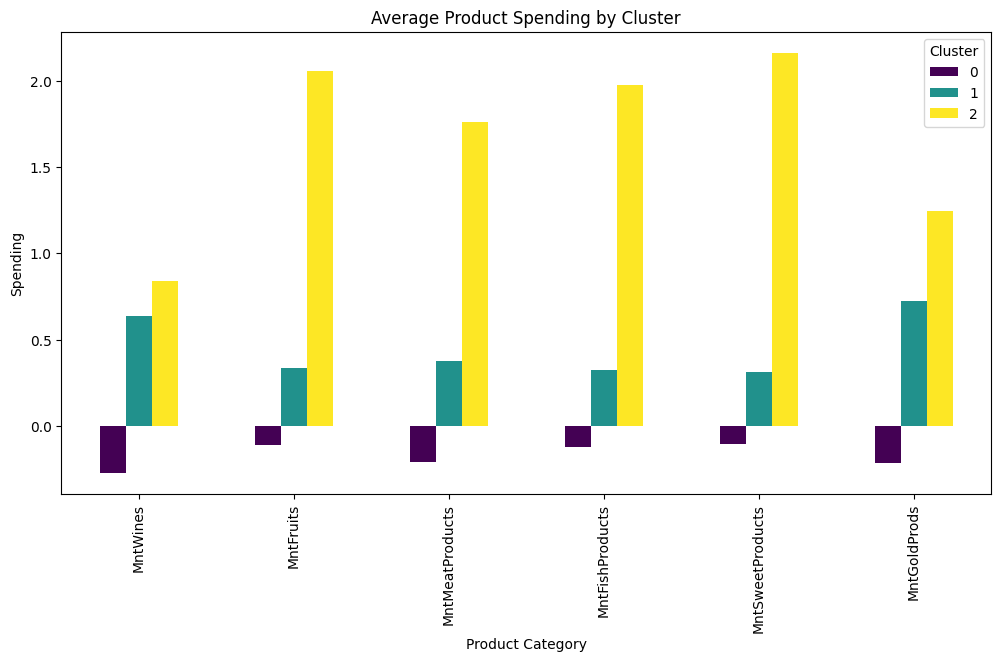

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import seaborn as sns

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
final_df['Cluster'] = kmeans.fit_predict(X_scaled)
data_df['Cluster'] = final_df['Cluster'].copy()
# Summarize product spending by cluster
product_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cluster_summary = final_df.groupby('Cluster')[product_features].mean()

cluster_summary.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Product Spending by Cluster')
plt.ylabel('Spending')
plt.xlabel('Product Category')
plt.legend(title='Cluster')
plt.show()
plt.figure(figsize=(14, 10))


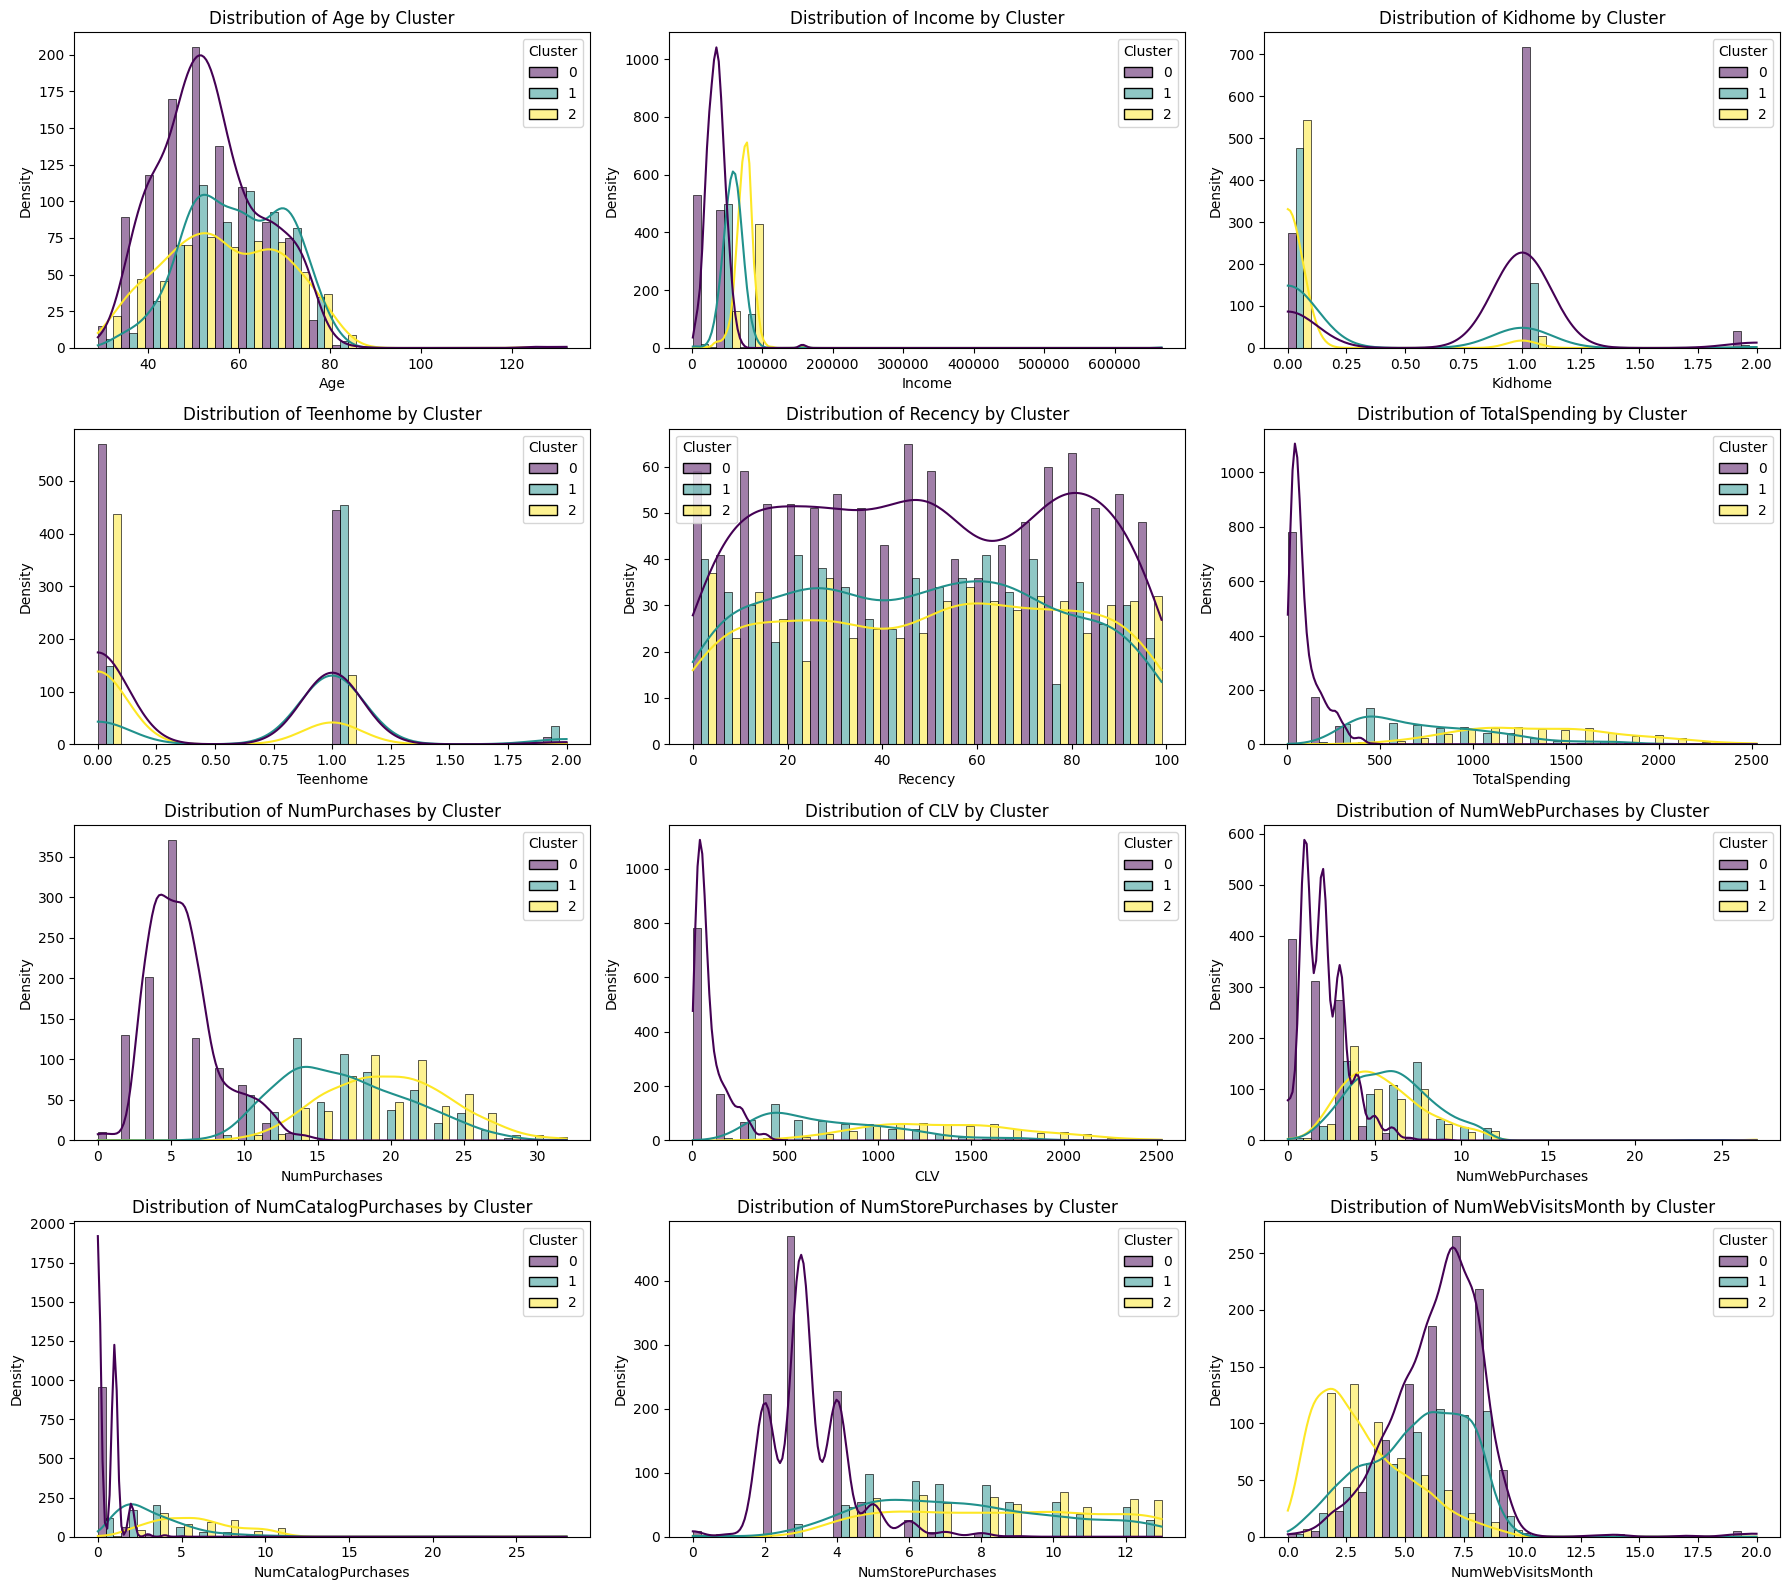

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer l'âge à partir de l'année de naissance
data_df['Age'] = 2025 - data_df['Year_Birth']  # Supposons que l'année actuelle est 2025

# Colonnes à afficher
columns = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'TotalSpending', 'NumPurchases', 'CLV', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Set up the plot
plt.figure(figsize=(18, 16))

# Plot histogram for each column (Age, Income) by cluster
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # Create a 4x3 grid of subplots
    sns.histplot(
        data=data_df,
        x=col,
        hue='Cluster',  # Group by clusters
        kde=True,
        palette='viridis',
        multiple='dodge',
        bins=20
    )
    plt.title(f'Distribution of {col} by Cluster')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')  # Change y-axis label to 'Density'

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## 7 Prédiction du 'churn' client avec un modèle de régression logistique

Accuracy: 0.9836
F1 Score: 0.9702
Confusion Matrix:
 [[482   2]
 [  9 179]]


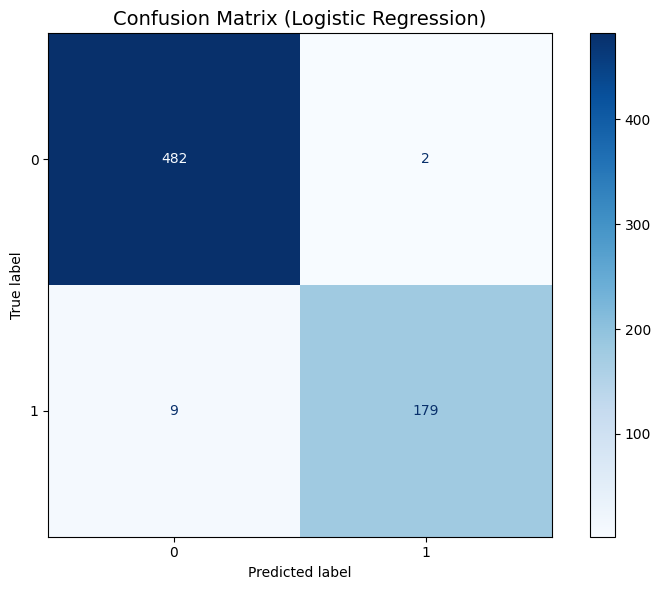

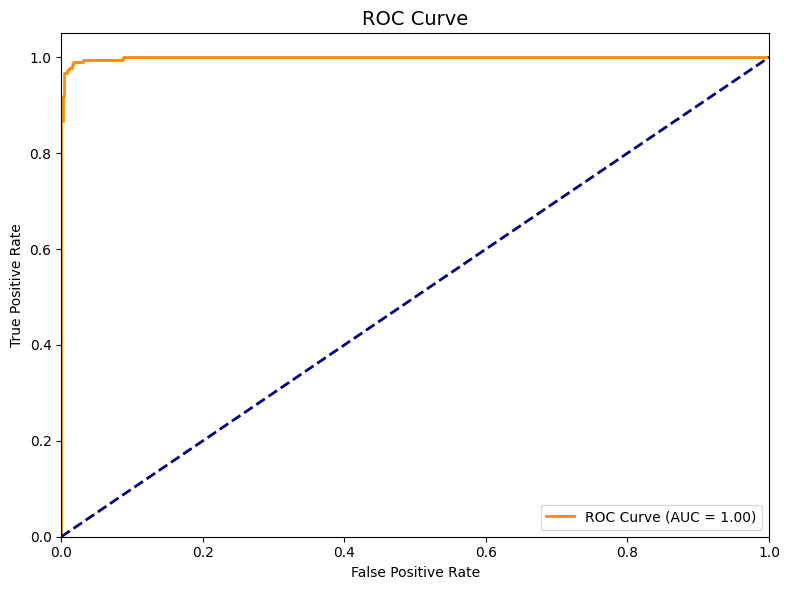

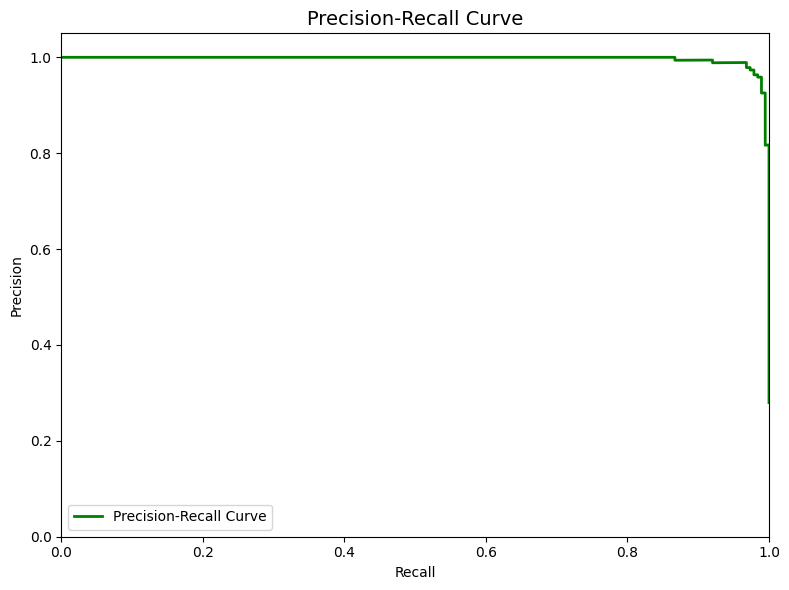

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create 'Churn' column based on 'Recency' quantile
final_df['Churn'] = (final_df['Recency'] > final_df['Recency'].quantile(0.75)).astype(int)
y = final_df['Churn']
X = final_df.drop(columns=['Churn', 'ID'], errors='ignore')
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and probabilities
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Calculate the F1 score
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Confusion Matrix Plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix (Logistic Regression)", fontsize=14)
plt.tight_layout()
plt.show()

# ROC Curve Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title('ROC Curve', fontsize=14)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Precision-Recall Curve Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_title('Precision-Recall Curve', fontsize=14)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()


## 8 Customer Lifetime Value (CLV) d'un client avec un random forest regressor

R² Score: 0.9999
MSE: 0.0029


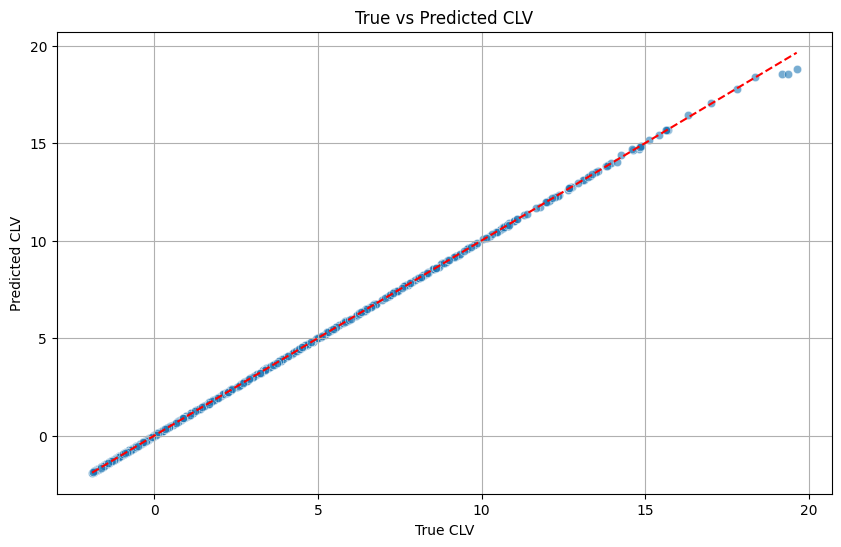

In [20]:

# ML: Predicting CLV
# Define features and target
X = final_df.drop(columns=['CLV'], errors='ignore').select_dtypes(include='number')  # Numeric features
y = final_df['CLV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Visualize predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('True vs Predicted CLV')
plt.xlabel('True CLV')
plt.ylabel('Predicted CLV')
plt.grid(True)
plt.show()


## 9 Score d'engagement CES avec un t-sne

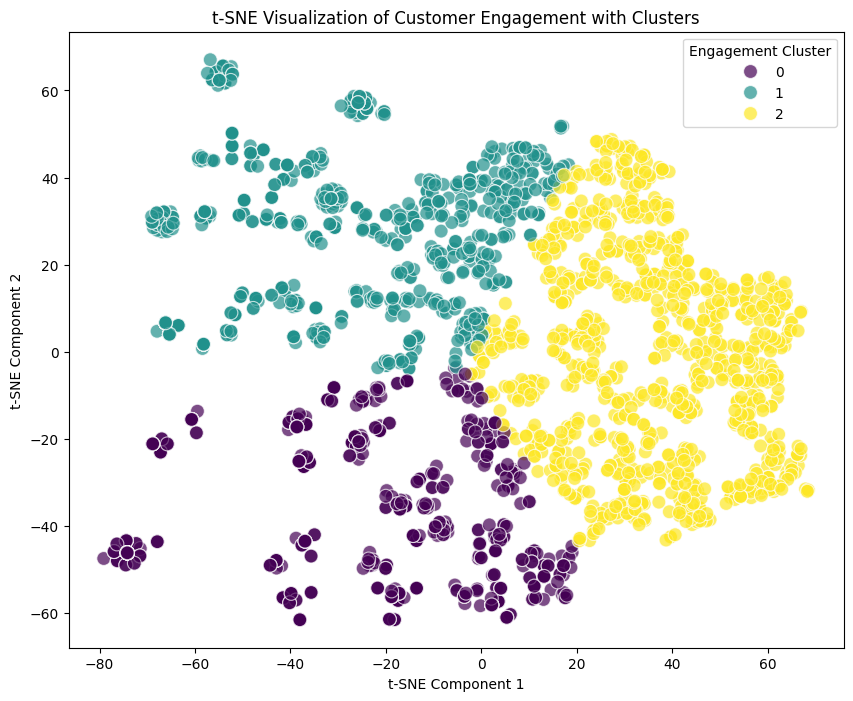

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant engagement features from the dataset
engagement_features = final_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardize the engagement features
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(engagement_features)

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
engagement_tsne = tsne.fit_transform(engagement_scaled)

# Create new columns for t-SNE coordinates
final_df['TSNE1'] = engagement_tsne[:, 0]
final_df['TSNE2'] = engagement_tsne[:, 1]

# Perform clustering directly on the t-SNE output
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
final_df['EngagementCluster'] = kmeans.fit_predict(engagement_tsne)  # Use t-SNE data for clustering

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', 
    y='TSNE2', 
    hue='EngagementCluster', 
    data=final_df, 
    palette='viridis', 
    s=100, 
    alpha=0.7
)
plt.title('t-SNE Visualization of Customer Engagement with Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Engagement Cluster')
plt.show()


## 10 Visualisation de taux d'engagement selon le clustering

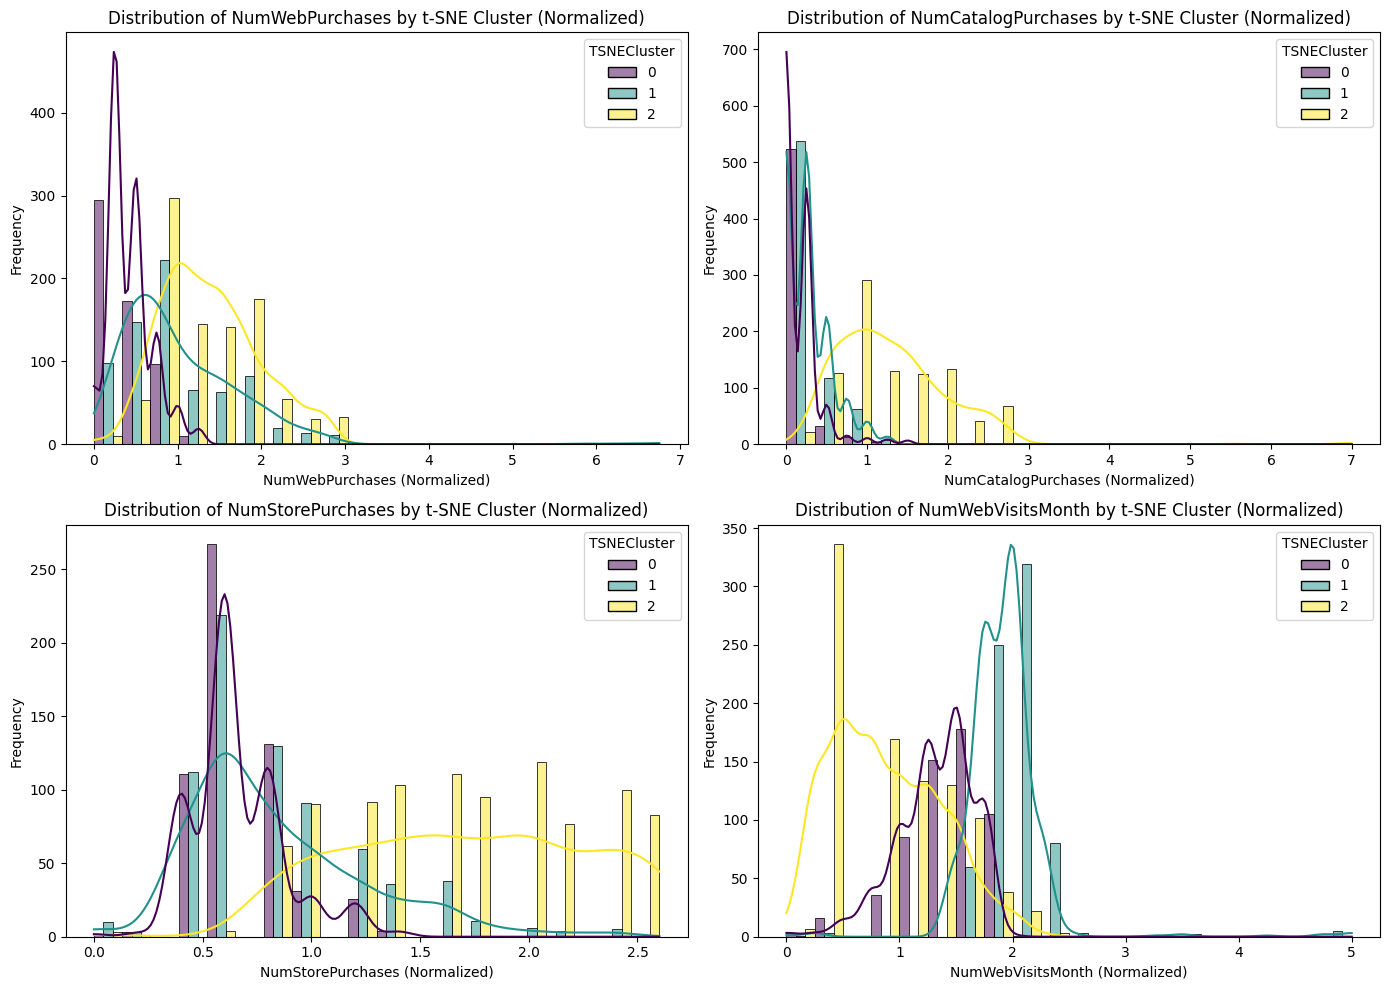

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Select relevant engagement features from the dataset
engagement_features = final_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardize the engagement features
scaler = StandardScaler()
engagement_scaled = scaler.fit_transform(engagement_features)

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
engagement_tsne = tsne.fit_transform(engagement_scaled)

# Add t-SNE components to the final dataframe
final_df['TSNE1'] = engagement_tsne[:, 0]
final_df['TSNE2'] = engagement_tsne[:, 1]

# Apply KMeans clustering on t-SNE components
kmeans_tsne = KMeans(n_clusters=3, random_state=42)
final_df['TSNECluster'] = kmeans_tsne.fit_predict(engagement_tsne)

# List of engagement features for visualization
engagement_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


adjusted_engagement_features = (engagement_scaled * scaler.scale_) + scaler.mean_
normalized_engagement_features = adjusted_engagement_features - adjusted_engagement_features.min(axis=0)

# Replace original columns in the DataFrame with normalized values
for i, col in enumerate(engagement_columns):
    final_df[col + '_normalized'] = normalized_engagement_features[:, i]

# Set up the plot
plt.figure(figsize=(14, 10))

# Plot histogram for each normalized feature
for i, col in enumerate(engagement_columns, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.histplot(
        data=final_df,
        x=col + '_normalized',
        hue='TSNECluster',
        kde=True,
        palette='viridis',
        multiple='dodge',
        bins=20
    )
    plt.title(f'Distribution of {col} by t-SNE Cluster (Normalized)')
    plt.xlabel(f'{col} (Normalized)')
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
